In [1]:
import glob
import numpy as np
from pathlib import Path
from math import floor
import timeit
import os
import random
import matplotlib.pyplot as plt

from sklearn.metrics import auc, precision_recall_curve                                                  


# Define data directories
DCA_ER_dir = '/data/cresswellclayec/DCA_ER' # Set DCA_ER directory
biowulf_dir = '%s/biowulf_full' % DCA_ER_dir
processed_data_dir = "%s/protein_data/data_processing_output/" % biowulf_dir

pdb_path = "/data/cresswellclayec/DCA_ER/biowulf_full/protein_data/metrics"
data_path = "/data/cresswellclayec/DCA_ER/biowulf_full/protein_data/data_processing_output"
metric_dir = "/data/cresswellclayec/DCA_ER/biowulf_full/protein_data/metrics"


ER_tprs = []
ER_fprs = []
PMF_tprs = []
PMF_fprs = []
PLM_tprs = []
PLM_fprs = []
MF_tprs = []
MF_fprs = []

ER_bootstrap_aucs = []

MSA_sizes = []
# # Get list of files from completed TP files
# tp_files = list(Path(pdb_path).rglob("*PLM_tp.npy"))
# tp_files_str = [str(os.path.basename(path)) for path in tp_files]
# pfam_ids = [tp_str[5:12] for tp_str in tp_files_str] 
# pdb_ids = [tp_str[:4] for tp_str in tp_files_str] 

file_end = '_uni_ld5.npy'
file_end = '_uni.npy'
file_end = '.npy'

# Get list of files from completed auc-bootstrap files
boot_auc_files = list(Path(pdb_path).rglob("*bootstrap_aucs.npy"))
boot_auc_files_str = [str(os.path.basename(path)) for path in boot_auc_files]
pfam_ids = [tp_str[:7] for tp_str in boot_auc_files_str] 
pdb_ids = [tp_str[8:12] for tp_str in boot_auc_files_str] 
effective_seqs = []
print(pfam_ids[:10])
for i, pdb_id in enumerate(pdb_ids):
    pfam_id = pfam_ids[i]
    try:
        ER_fp_file = "%s/%s_%s_ER_fp%s" % (pdb_path, pdb_id, pfam_id, file_end)
        ER_tp_file = "%s/%s_%s_ER_tp%s" % (pdb_path, pdb_id, pfam_id, file_end)
        ER_fp = np.load(ER_fp_file)
        ER_tp = np.load(ER_tp_file)
        
        PMF_fp_file = "%s/%s_%s_PMF_fp%s" % (pdb_path, pdb_id, pfam_id, file_end)
        PMF_tp_file = "%s/%s_%s_PMF_tp%s" % (pdb_path, pdb_id, pfam_id, file_end)
        PMF_fp = np.load(PMF_fp_file)
        PMF_tp = np.load(PMF_tp_file)
        
        PLM_fp_file = "%s/%s_%s_PLM_fp%s" % (pdb_path, pdb_id, pfam_id, file_end)
        PLM_tp_file = "%s/%s_%s_PLM_tp%s" % (pdb_path, pdb_id, pfam_id, file_end)
        PLM_fp = np.load(PLM_fp_file)
        PLM_tp = np.load(PLM_tp_file)
        
        MF_fp_file = "%s/%s_%s_MF_fp%s" % (pdb_path, pdb_id, pfam_id, file_end)
        MF_tp_file = "%s/%s_%s_MF_tp%s" % (pdb_path, pdb_id, pfam_id, file_end)
        MF_fp = np.load(MF_fp_file)
        MF_tp = np.load(MF_tp_file)   
        
        ER_bootstrap_file = "%s/%s_%s_bootstrap_aucs.npy" % (pdb_path, pfam_id, pdb_id)
        ER_bootstrap = np.load(ER_bootstrap_file)
        
        MSA_file = "%s/%s_%s_preproc_msa.npy" % (data_path, pfam_id, pdb_id)
        MSA = np.load(MSA_file)
        
        pfam_dimensions_file = "%s%s_%s_pfam_dimensions.npy" % (processed_data_dir, pdb_id, pfam_id)
        pfam_dimensions = np.load(pfam_dimensions_file)



    except(FileNotFoundError):
        continue
    PMF_fprs.append(PMF_fp)
    PMF_tprs.append(PMF_tp)
    MF_fprs.append(MF_fp)
    MF_tprs.append(MF_tp)
    ER_fprs.append(ER_fp)
    ER_tprs.append(ER_tp)
    PLM_fprs.append(PLM_fp)
    PLM_tprs.append(PLM_tp)
    
    ER_bootstrap_aucs.append(ER_bootstrap)
    MSA_sizes.append(MSA.shape)
    if len(pfam_dimensions)==7:
        [n_col, n_seq, m_eff, ct_ER, ct_MF, ct_PMF, ct_PLM] = pfam_dimensions
    elif len(pfam_dimensions)==3:
        [n_col, n_seq, m_eff] = pfam_dimensions
    effective_seqs.append(m_eff)

print(len(pfam_ids), ' Pfams plotted')

['PF00303', 'PF06815', 'PF02670', 'PF00061', 'PF01564', 'PF00567', 'PF01433', 'PF00241', 'PF00190', 'PF00509']
6541  Pfams plotted


# Plotting all ROC curves

[0.00000000e+00 4.45721781e-05 4.45721781e-05 ... 3.08051926e-03
 3.08093342e-03 3.08134758e-03]
[0.00000000e+00 2.43516376e-05 2.48669618e-05 ... 9.91419295e-01
 9.98144712e-01 1.00000000e+00]


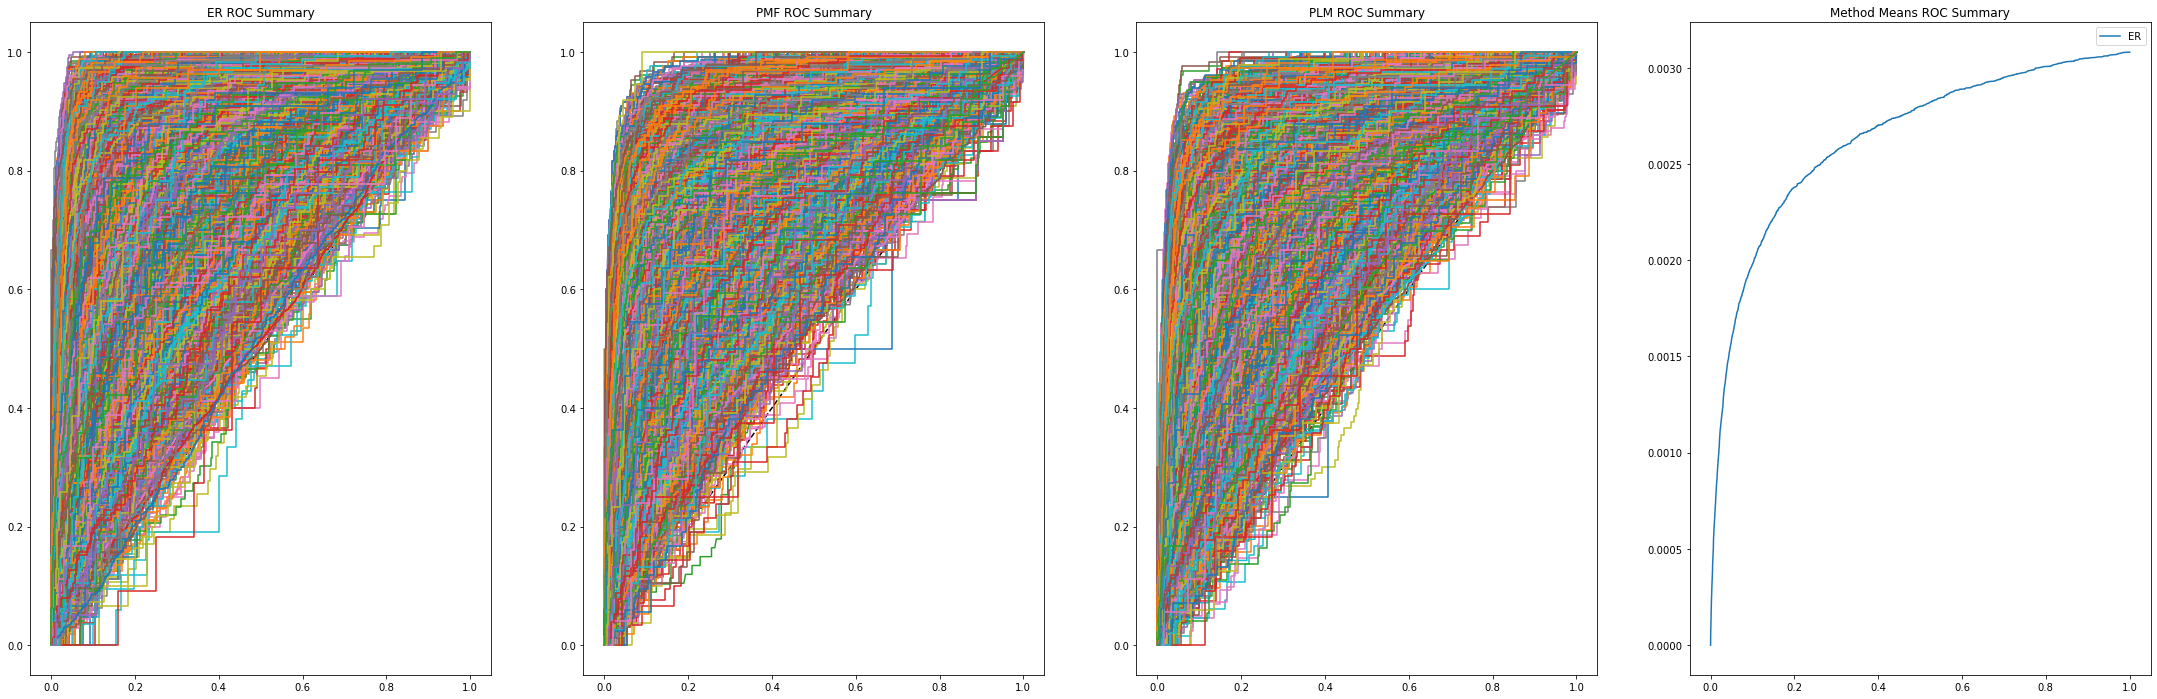

In [11]:
# method_tprs = [ER_tprs, PMF_tprs, PLM_tprs, MF_tprs]
# method_fprs = [ER_fprs, PMF_fprs, PLM_fprs, MF_fprs]
# method_label = ['ER', 'PMF', 'PLM', 'MF']

method_tprs = [ER_tprs, PMF_tprs, PLM_tprs]
method_fprs = [ER_fprs, PMF_fprs, PLM_fprs]
method_label = ['ER', 'PMF', 'PLM']
method_color = 'brg'
plt.figure(figsize=(38.0,12))
method_aucs = []
for i, method_tpr_data in enumerate(method_tprs):
    method_fpr_data = method_fprs[i]
    method_aucs.append([])
    # Initalize ROC-curve tile
    plt.subplot2grid((1,4),(0,i))
    plt.title('%s ROC Summary' % method_label[i])
    plt.plot([0,1],[0,1],'k--')

    for j, tpr in enumerate(method_tpr_data):

        fpr = method_fpr_data[j]
        method_aucs[-1].append(auc(fpr,tpr))
        try:
            plt.plot(fpr, tpr)
        except:
            pass
plt.subplot2grid((1,4),(0,3))
plt.title('Method Means ROC Summary')
# plt.plot([0,1],[0,1],'k--')

for i, method in enumerate(method_label[:1]):
    avg_fpr = np.load('%s/%s_avg_fpr.npy' % (metric_dir, method))
    avg_tpr = np.load('%s/%s_avg_tpr.npy' % (metric_dir, method))
    print(avg_tpr)
    print(avg_fpr)
    plt.plot(avg_fpr, avg_tpr, label=method)
plt.legend()
plt.show()

# Histogram of AUC values

In [ ]:
# bin AUC values for each method
plt.figure(figsize=(12.0,12))


for i, method_auc in enumerate(method_aucs):
    method = method_label[i]
    plt.hist(method_auc, density=True, bins=25, alpha=.3, label = method, color=method_color[i])  # density=False would make counts
    plt.hist(method_auc, density=True, bins=25, histtype='step', color=method_color[i], linewidth=1.4)  # density=False would make counts

plt.legend()
plt.title('AUC values')
plt.ylabel('AUC')
plt.xlabel('Data');
plt.show()


# Which Method is Best

In [ ]:
# plot best Method
max_auc_indices = []
max_aucs = []
auc_differences = []
for i, er_auc in enumerate(method_aucs[0]):
    pmf_auc = method_aucs[1][i]
    plm_auc = method_aucs[2][i]
    auc_compare = [er_auc, pmf_auc, plm_auc]
    max_auc = max(auc_compare)
    max_aucs.append(max_auc)
    max_auc_index = auc_compare.index(max_auc)
    max_auc_indices.append(max_auc_index)
    auc_differences.append(abs(max_auc - np.mean([auc for auc in auc_compare if auc!=max_auc])))
    
    # confidence intervals
    alpha = 0.95
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(ER_bootstrap_aucs[i], p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(ER_bootstrap_aucs[i], p))
    #print('ER auc =%f PLM auc=%f PMF auc=%f\n%.1f confidence interval %.1f%% and %.1f%%' % 
    #      (er_auc, plm_auc, pmf_auc, alpha*100, lower*100, upper*100))
    if max_auc_index == 0 and np.mean([auc for auc in auc_compare if auc!=max_auc]) < lower:
        max_auc_indices.append(.25)


plt.figure(figsize=(26.0,12))
ax = plt.subplot2grid((1,2),(0,0))
ax.hist(max_auc_indices ,range=(0,2) )  # density=False would make counts
ax.set_xticks([0,.25,1,2])
ax.set_xticklabels(['ER', 'ER clear', 'PMF', 'PLM'])
plt.subplot2grid((1,2), (0,1))
plt.hist(auc_differences, bins = 100, range=(0,.3))  # density=False would make counts
plt.title('Difference between best and mean of losers\naverage: %f' % np.mean(auc_differences))
plt.show()

# Binning By Column Length

In [ ]:
def bin_by(aucs, max_aucs, shapes, metric_label='cols', n_bins=5):
    n_bins = 10
    
    # set up bins
    binned_auc = []
    binned_method = []
    binned_range = []
    for i in range(n_bins):
        binned_auc.append([])
        binned_method.append([])

    # clear values with not enough sequences.
    bad_indices = []
    for i, msa_shape in enumerate(shapes):
        if msa_shape[0] < 300:
            # print('%d seqs not enough' % msa_shape[0])
            bad_indices.append(i)
    bad_indices = sorted(bad_indices, reverse=True)
    for idx in bad_indices:
        if idx < len(shapes):
            shapes.pop(idx)
            aucs.pop(idx)
            max_aucs.pop(idx)
            
    # set up metric
    if metric_label=='cols':
        metric = [msa_shape[1] for msa_shape in shapes]
    elif metric_label=='num_seq':
        metric = [msa_shape[0] for msa_shape in shapes]
    

    # bin metric values
    if metric_label=='cols':
        bins = np.linspace(min(metric), max(metric), num=n_bins)
    elif metric_label=='num_seq':
        print(min(metric), max(metric))
        bins = np.geomspace(min(metric), max(metric), num=n_bins)

    for i, auc in enumerate(aucs):
        for j, (lower, upper) in enumerate(zip(bins, bins[1:])):
            if i==0:
                binned_range.append((lower,upper))
            if metric[i] >= lower and metric[i] <= upper:
                binned_auc[j].append(auc)
                binned_method[j].append(max_aucs[i])
    return binned_auc, binned_method, binned_range



print(';%d, %d, %d' % (len(max_aucs), len(max_auc_indices), len(MSA_sizes)))
binned_auc, binned_method, binned_range = bin_by(max_aucs, max_auc_indices, MSA_sizes, metric_label='cols', n_bins=5)  
print(binned_range)

plt.figure(figsize=(26.0,12))
for i, auc_bin in enumerate(binned_auc[:-1]):
    method_bin = binned_method[i]
    
    ax = plt.subplot2grid((2,len(binned_auc)), (0,i))
    ax.hist(method_bin ,range=(0,2) )  # density=False would make counts
    ax.set_xticks([0,.25,1,2])
    ax.set_xticklabels(['ER', 'ER clear', 'PMF', 'PLM'])
    ax.set_title('%s\n[%d,%d]' %('cols', binned_range[i][0], binned_range[i][1]))
    plt.subplot2grid((2,len(binned_auc)),(1,i))
    plt.hist(auc_bin, bins = 100)  # density=False would make counts
plt.show()

In [ ]:
    
binned_auc, binned_method, binned_range = bin_by(max_aucs, max_auc_indices, MSA_sizes, metric_label='num_seq', n_bins=5)  
print(binned_range)

plt.figure(figsize=(26.0,12))
for i, auc_bin in enumerate(binned_auc[:-1]):
    method_bin = binned_method[i]
    
    ax = plt.subplot2grid((2,len(binned_auc)), (0,i))
    ax.hist(method_bin ,range=(0,2) )  # density=False would make counts
    ax.set_xticks([0,.25,1,2])
    ax.set_xticklabels(['ER', 'ER clear', 'PMF', 'PLM'])
    ax.set_title('%s\n[%d,%d]' %('Sequences', binned_range[i][0], binned_range[i][1]))
    plt.subplot2grid((2,len(binned_auc)),(1,i))
    plt.hist(auc_bin, bins = 100)  # density=False would make counts
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
def gen_auc_df(aucs, max_aucs, shapes, pdb_ids, pfam_ids):
    cols = [msa_shape[1] for msa_shape in shapes]
    seqs = [msa_shape[0] for msa_shape in shapes]
    best_method = []
    for x in max_aucs:
        if x==0:
            best_method.append('ER')
        elif x==1:
            best_method.append('PMF')
        elif x==2:
            best_method.append('PLM')
    zipped = list(zip(aucs, best_method, seqs, effective_sequences, cols, pdb_ids, pfam_ids))
    df_labels = ['AUC', 'Best Method', '# Sequences', 'Effective Sequence #', '# Positions', 'PDB ID', 'Pfam ID']
    df = pd.DataFrame(zipped, columns=df_labels)
    return df

auc_df = gen_auc_df(max_aucs, max_auc_indices, MSA_sizes, pdb_ids, pfam_ids)



In [ ]:
print(auc_df[auc_df.AUC==auc_df.AUC.max()])

In [ ]:
np.save('ER_avg_fpr.npy', avg_ER_fpr)
np.save('ER_avg_trp.npy', avg_ER_tpr)
np.save('PMF_avg_fpr.npy',avg_PMF_fpr)
np.save('PMF_avg_tpr.npy',avg_PMF_tpr)
np.save('PLM_avg_fpr.npy',avg_PLM_fpr)
np.save('PLM_avg_tpr.npy',avg_PLM_tpr)